In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()
Base.prepare(autoload_with=engine)

# reflect the tables
measurement= Base.classes.measurement 
station  = Base.classes.station 

In [7]:
# View all of the classes that automap found
Base.classes.keys()

['station', 'measurement']

In [8]:
# Save references to each table
measurement= Base.classes.measurement 
station  = Base.classes.station 

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine) 

# Exploratory Precipitation Analysis

In [19]:
# Find the most recent date in the data set.
recent_date =session.query(func.max(measurement.date)).scalar() 
recent_date

'2017-08-23'

<Axes: xlabel='Date', ylabel='Inches'>

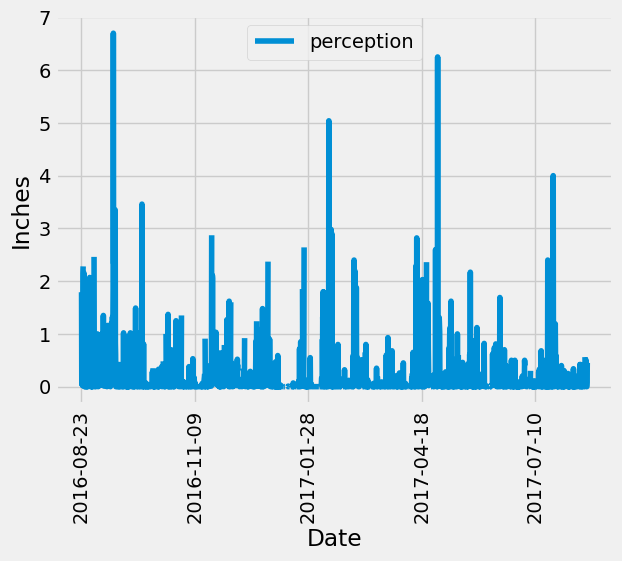

In [26]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
year_one = dt.date(2017,8,23) - dt.timedelta(days=365) 
year_one

# Perform a query to retrieve the data and precipitation scores
perception_data = session.query(measurement.date,measurement.prcp).filter(measurement.date >=year_one).all()
perception_data
# Save the query results as a Pandas DataFrame. Explicitly set the column names
df=pd.DataFrame(perception_data,columns=['date','perception']) 
df

# Sort the dataframe by date
df.set_index('date',inplace=True) 
df=df.sort_values(by='date')

# Use Pandas Plotting with Matplotlib to plot the data
df.plot(xlabel='Date',ylabel='Inches',rot=90)

In [27]:
# Use Pandas to calculate the summary statistics for the precipitation data
summary_stats=df.describe() 
summary_stats

,perception
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [29]:
# Design a query to calculate the total number of stations in the dataset
total_stations=session.query(func.count(station.station.distinct())).scalar() 
total_stations

9

In [32]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
total_stations=session.query(measurement.station,func.count(measurement.station))\
    .group_by(measurement.station).order_by(func.count(measurement.station).desc()).all() 
total_stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [35]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
lowest_temp= session.query(func.min(measurement.tobs)).filter(measurement.station == 'USC00519281').scalar()
highest_temp= session.query(func.max(measurement.tobs)).filter(measurement.station == 'USC00519281').scalar()
average_temp= session.query(func.avg(measurement.tobs)).filter(measurement.station == 'USC00519281').scalar()
print(lowest_temp,highest_temp,average_temp)



54.0 85.0 71.66378066378067


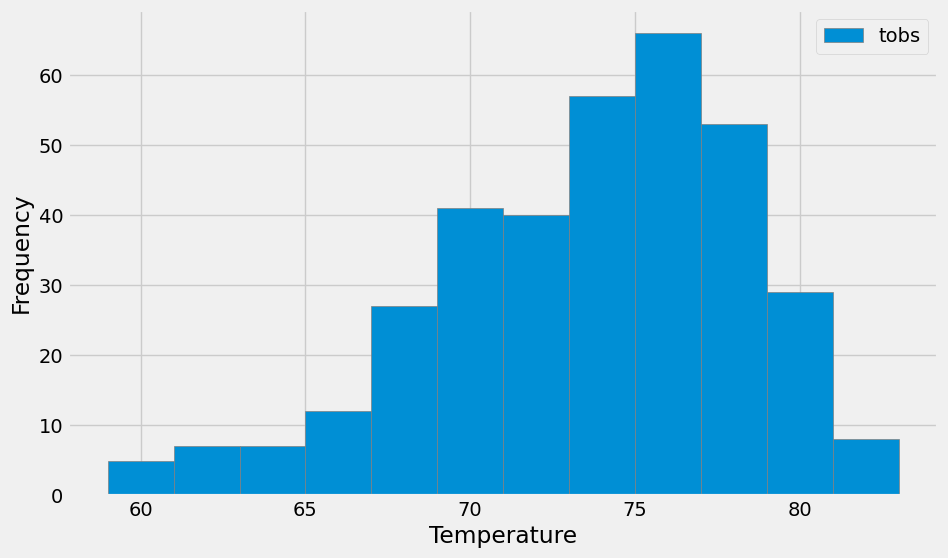

In [40]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
most_active_station_id = 'USC00519281'

# Query the last 12 months of temperature observation data for the most active station
temperature_data = session.query(measurement.tobs).filter(
    measurement.station == most_active_station_id,
    measurement.date >= year_one
).all()

# Convert query results to a list of temperatures
temperatures = [temp[0] for temp in temperature_data]

# Plot the results as a histogram
plt.figure(figsize=(10, 6))
plt.hist(temperatures, bins=12, edgecolor= "gray", label='tobs')
plt.xlabel('Temperature')
plt.ylabel('Frequency') 
plt.legend()
plt.show()


# Close Session

In [41]:
# Close Session
session.close()